In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sales = pd.read_csv('data\sales_dataset.csv')
sales.head(5)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [18]:
sales.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [19]:
print(sales.isnull().sum()) 
print(sales.duplicated().sum())  


Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64
0


In [20]:
print(sales.dtypes)

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object


In [21]:
sales['Date'] = pd.to_datetime(sales['Date'])

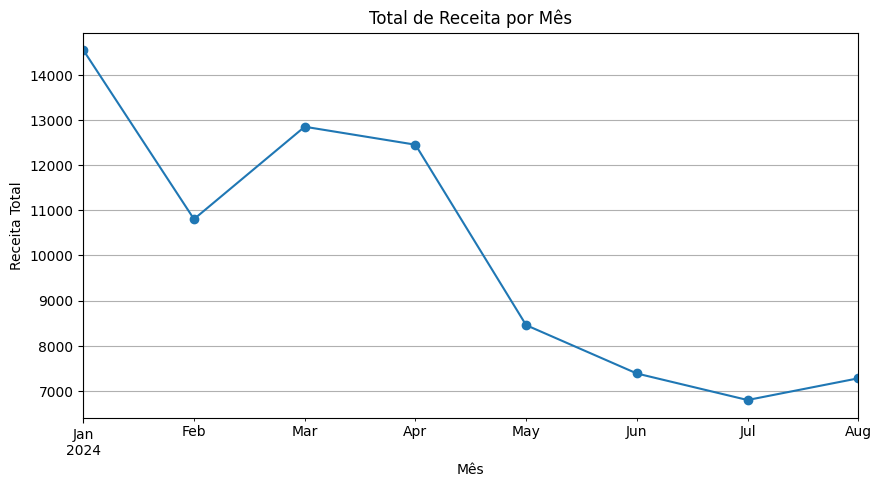

In [ ]:
"""Vendas ao longo do tempo"""

sales.groupby(sales["Date"].dt.to_period("M"))["Total Revenue"].sum().plot(kind="line", marker="o", figsize=(10, 5))
plt.title("Total de Receita por Mês")
plt.xlabel("Mês")
plt.ylabel("Receita Total")
plt.grid()
plt.show()


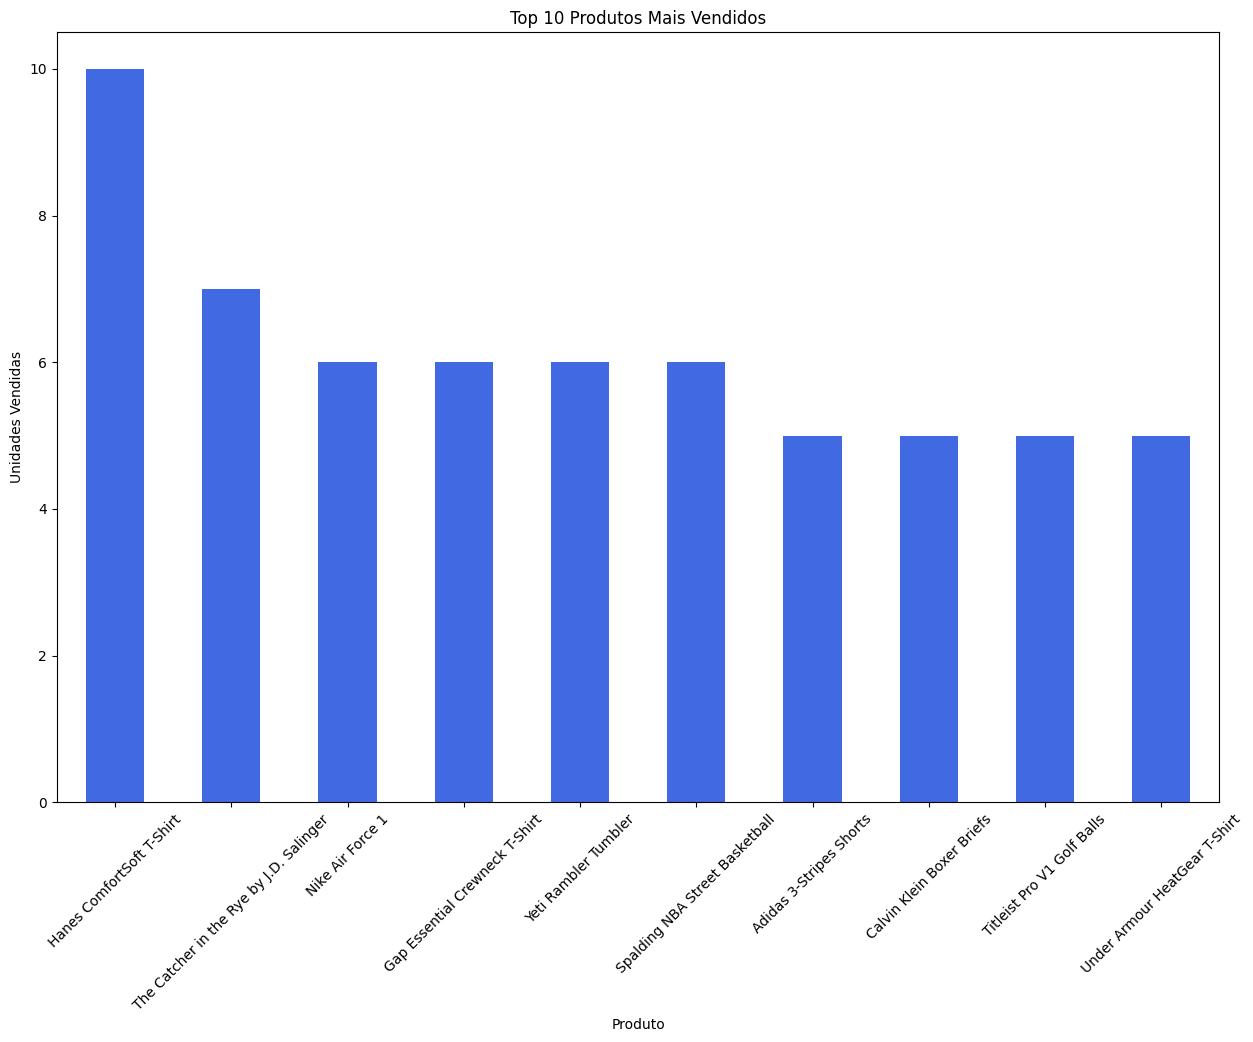

In [27]:
"""Produtos mais vendidos"""

top_products = sales.groupby("Product Name")["Units Sold"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", figsize=(15, 10), color="royalblue")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Produto")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45)
plt.show()


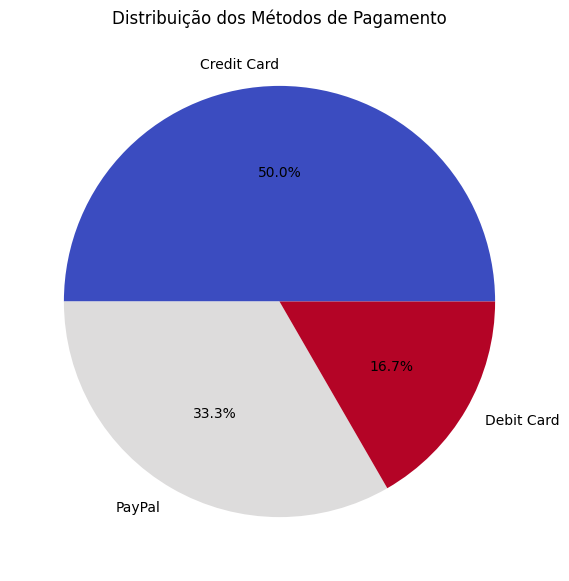

In [28]:
"""Métodos de pagamento mais utilizados"""

sales["Payment Method"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(7, 7), cmap="coolwarm")
plt.title("Distribuição dos Métodos de Pagamento")
plt.ylabel("")  # Remove rótulo do eixo Y
plt.show()


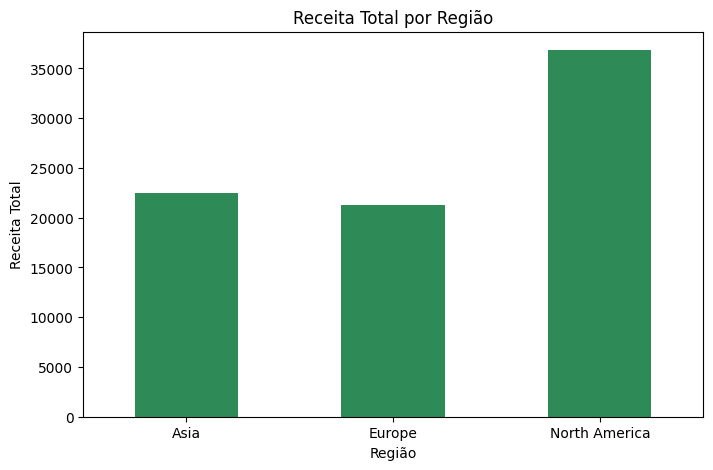

In [29]:
"""receita por região"""


sales.groupby("Region")["Total Revenue"].sum().plot(kind="bar", figsize=(8, 5), color="seagreen")
plt.title("Receita Total por Região")
plt.xlabel("Região")
plt.ylabel("Receita Total")
plt.xticks(rotation=0)
plt.show()